# 08_Training_Analysis

In this file we load the models saved in the 07_Experiment_1 file and visualise the training behavior. 
It is the file where loss curves were plotted also, e.g., for the other configurations. 

At the very end of this file is a section "For Paper & Individual Saving" in which we separate out the figures how they appear in the paper. 

In [2]:
import json 
import matplotlib.pyplot as plt 
import pandas as pd
import glob
import os
import numpy as np

In [3]:
## Finding the relevant files from the output folder

list_of_files = glob.glob('/workspace/output/') # * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)

In [5]:
list_of_files
len('/workspace/output/output_new_')

29

In [52]:
str.replace('bbox/AP50', '/','')

'bboxAP50'

In [13]:
plt.style.use("seaborn-v0_8-colorblind")

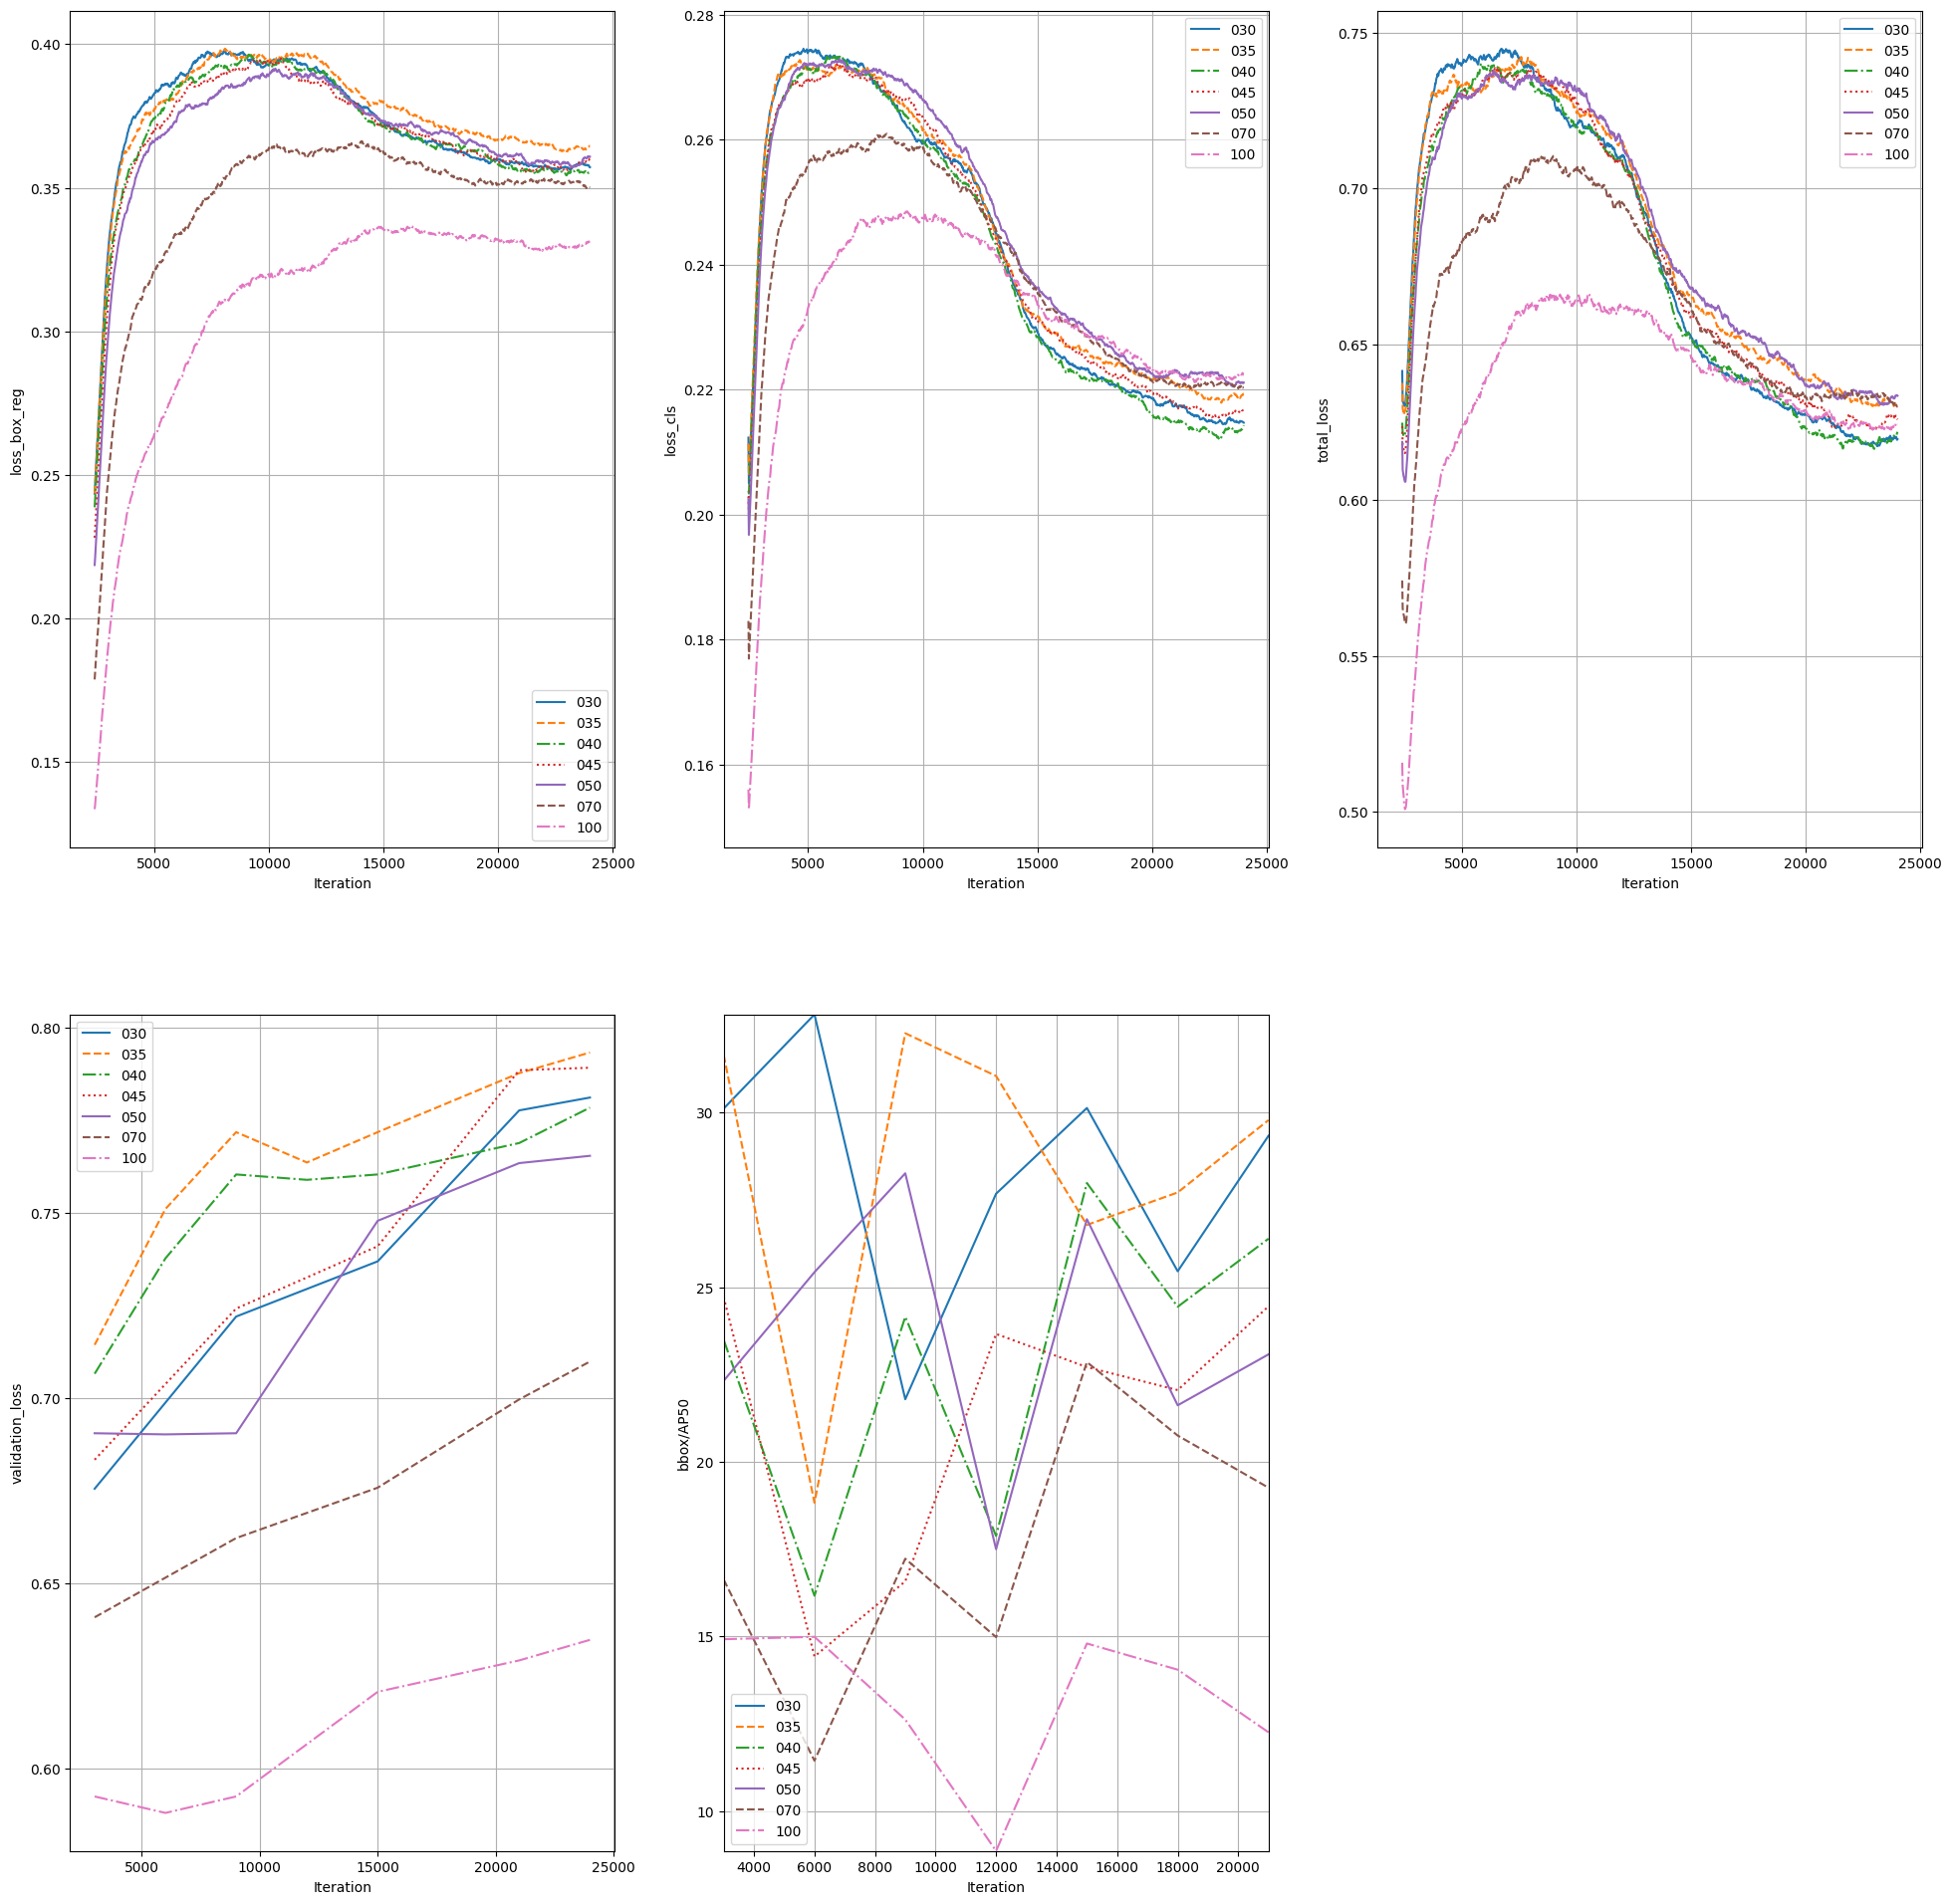

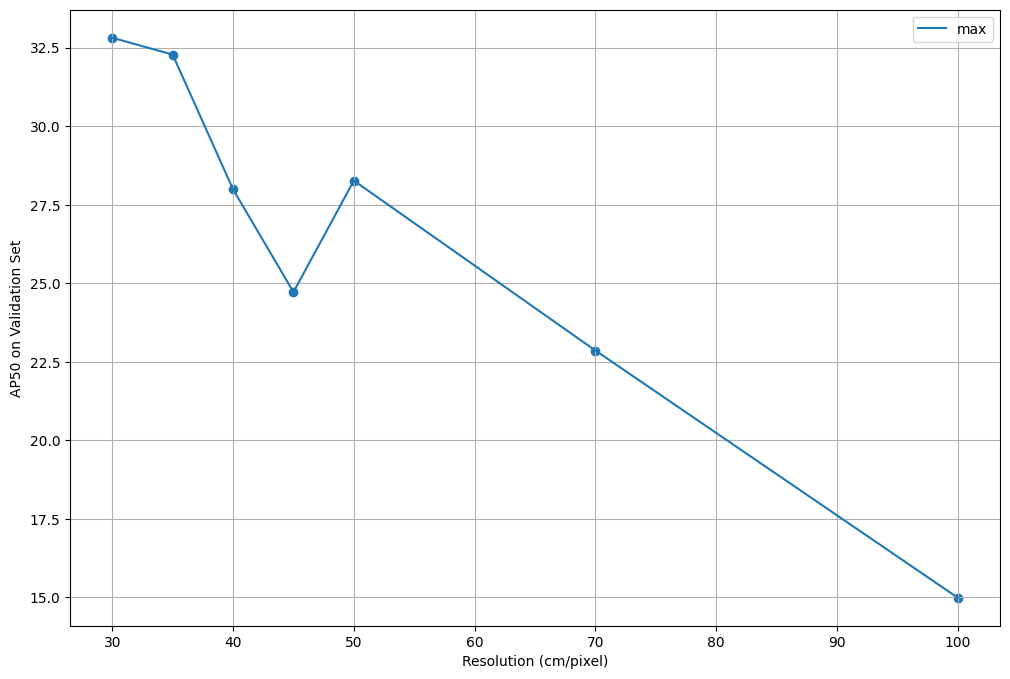

[32.81682642233817,
 32.27843785770798,
 27.988870390753867,
 24.72083905321142,
 28.267463549955007,
 22.859316243068942,
 14.990289542181182]

In [5]:
plotting_files = ['/workspace/output/experiment1_04.09.14.12/res030_30',
             '/workspace/output/experiment1_04.09.16.31/res035_35',
             '/workspace/output/experiment1_04.09.18.58/res040_40',
             '/workspace/output/experiment1_04.09.21.23/res045_45',
             '/workspace/output/experiment1_04.09.23.50/res050_50',
             '/workspace/output/experiment1_04.10.02.03/res070_70',
             '/workspace/output/experiment1_04.10.04.16/res100_100']


def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

ltys = ['-','--','-.',':']
resolution_set = ['030','035','040','045','050','070','100']

def plot_metrics(plotting_files, 
                 resolution_set, 
                window_divider = 10,   # divides the number of iterations for averaging window set
                losses = ['loss_box_reg', 'loss_cls', 'total_loss', 'validation_loss', 'bbox/AP50']): 
    ap50_max = []
    ap50_last = []

    plt.figure(figsize = (12*2,8*3))
    for n, loss in enumerate(losses):
        plt.subplot(2,3,n+1)
        
        l = 0
        for latest_file, res in zip(plotting_files, resolution_set):
            

            experiment_metrics = load_json_arr(latest_file + f'/metrics.json')

            ap50_max.append(max([met["bbox/AP50"] for met in experiment_metrics if 'bbox/AP50' in met and 'validation_loss' in met]))
            ap50_last.append([met["bbox/AP50"] for met in experiment_metrics  if 'bbox/AP50' in met and 'validation_loss' in met][-1])

            # Extract the values for the specified loss
            loss_values = [x[loss] for x in experiment_metrics if loss in x]

            if loss not in ['validation_loss','bbox/AP50'] and window_divider >0:
                window_size = round(len(loss_values)/window_divider)

                # Calculate the rolling average of the loss over a specified window size
                loss_avg = np.convolve(loss_values, np.ones(window_size) / window_size, mode='valid')            
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x][window_size-1:], 
                    loss_avg, 
                    label = res,
                    linestyle = ltys[l%(len(ltys))],
                    alpha = 1
                )
                plt.xlabel('Iteration')
                plt.ylabel(loss)
                #plt.title(loss)
                plt.legend()
                plt.grid()

            else: 
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x and 'validation_loss' in x], 
                    [x[loss] for x in experiment_metrics if loss in x and 'validation_loss' in x], 
                    label = res,
                    linestyle = ltys[l%(len(ltys))],
                    alpha = 1
                )
                plt.xlabel('Iteration')
                plt.ylabel(loss)
                #plt.title(loss)
                plt.legend()
                plt.grid()
            l += 1
        #plt.gca().set_axis_off()
    plt.margins(0,0)
    plt.savefig(f"/workspace/figures/loss_curves_{str.replace(loss, '/','')}", 
                bbox_inches = 'tight',
                pad_inches = .25)
    plt.show()

    plt.figure(figsize=(12,8))
    plt.plot([int(res) for res in resolution_set], ap50_max[:len(resolution_set)], label = "max")
    plt.scatter([int(res) for res in resolution_set], ap50_max[:len(resolution_set)])
#     plt.plot([int(res) for res in resolution_set], ap50_last[:len(resolution_set)], label = 'last')
#     plt.scatter([int(res) for res in resolution_set], ap50_last[:len(resolution_set)])
    plt.legend()
    plt.grid()
    plt.xlabel('Resolution (cm/pixel)')
    plt.ylabel("AP50 on Validation Set")
    plt.show()
    
    return ap50_max[:len(resolution_set)]
    
plot_metrics(plotting_files, resolution_set)

In [27]:
#!rm -r thesis_detectron

In [28]:
# Plot hyperparameter tuning

In [3]:
list_of_files = glob.glob('/workspace/output/experiment1_04.10.12.12/*') # * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)
print(list_of_files)

['/workspace/output/experiment1_04.10.12.12/res030_30', '/workspace/output/experiment1_04.10.12.12/res035_35', '/workspace/output/experiment1_04.10.12.12/res040_40', '/workspace/output/experiment1_04.10.12.12/res045_45', '/workspace/output/experiment1_04.10.12.12/res050_50', '/workspace/output/experiment1_04.10.12.12/res070_70', '/workspace/output/experiment1_04.10.12.12/res100_100', '/workspace/output/experiment1_04.10.12.12/results_tuning.json']


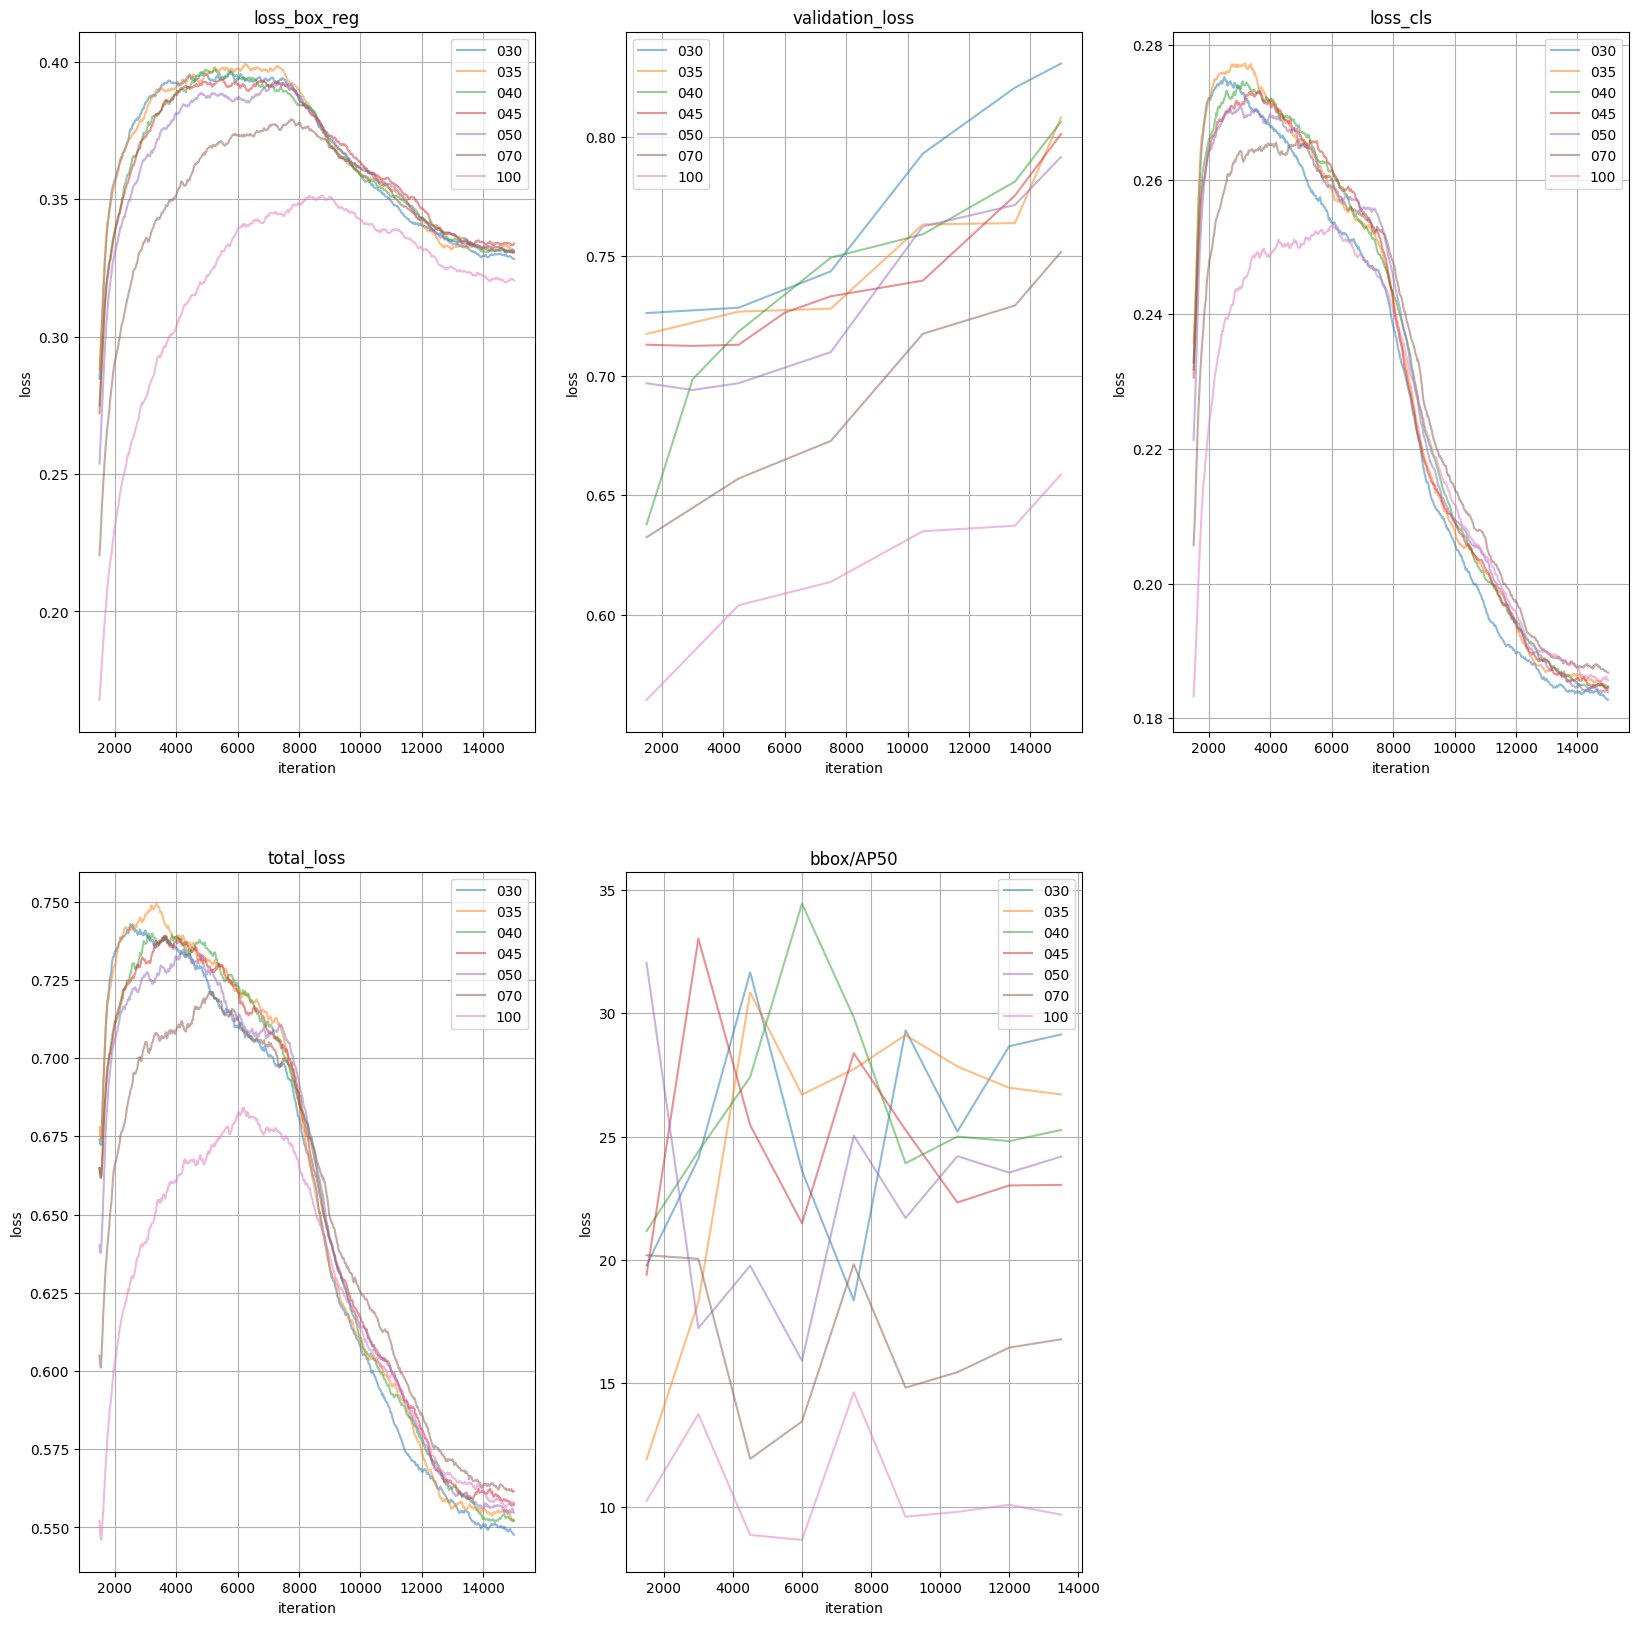

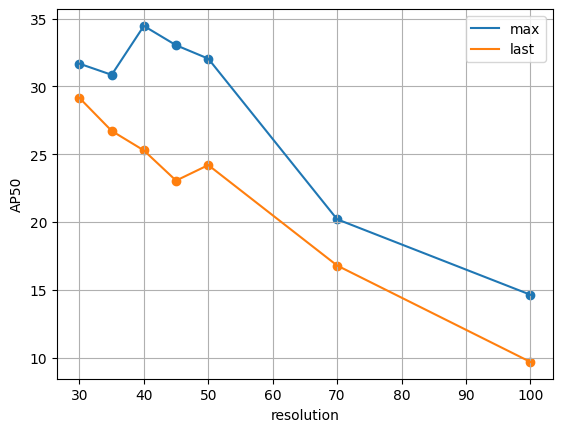

In [34]:
list_of_files = glob.glob('/workspace/output/experiment1_04.10.12.12/*') # * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)
plot_metrics(list_of_files[:-1], resolution_set)

In [4]:
list_of_files = glob.glob('/workspace/output/experiment1_val_conf3_04.14.15.43/*') # * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)
print(list_of_files)

['/workspace/output/experiment1_val_conf3_04.14.15.43/res030_30', '/workspace/output/experiment1_val_conf3_04.14.15.43/res035_35', '/workspace/output/experiment1_val_conf3_04.14.15.43/res040_40', '/workspace/output/experiment1_val_conf3_04.14.15.43/res045_45', '/workspace/output/experiment1_val_conf3_04.14.15.43/res050_50', '/workspace/output/experiment1_val_conf3_04.14.15.43/res070_70', '/workspace/output/experiment1_val_conf3_04.14.15.43/res100_100', '/workspace/output/experiment1_val_conf3_04.14.15.43/results_tuning.json']


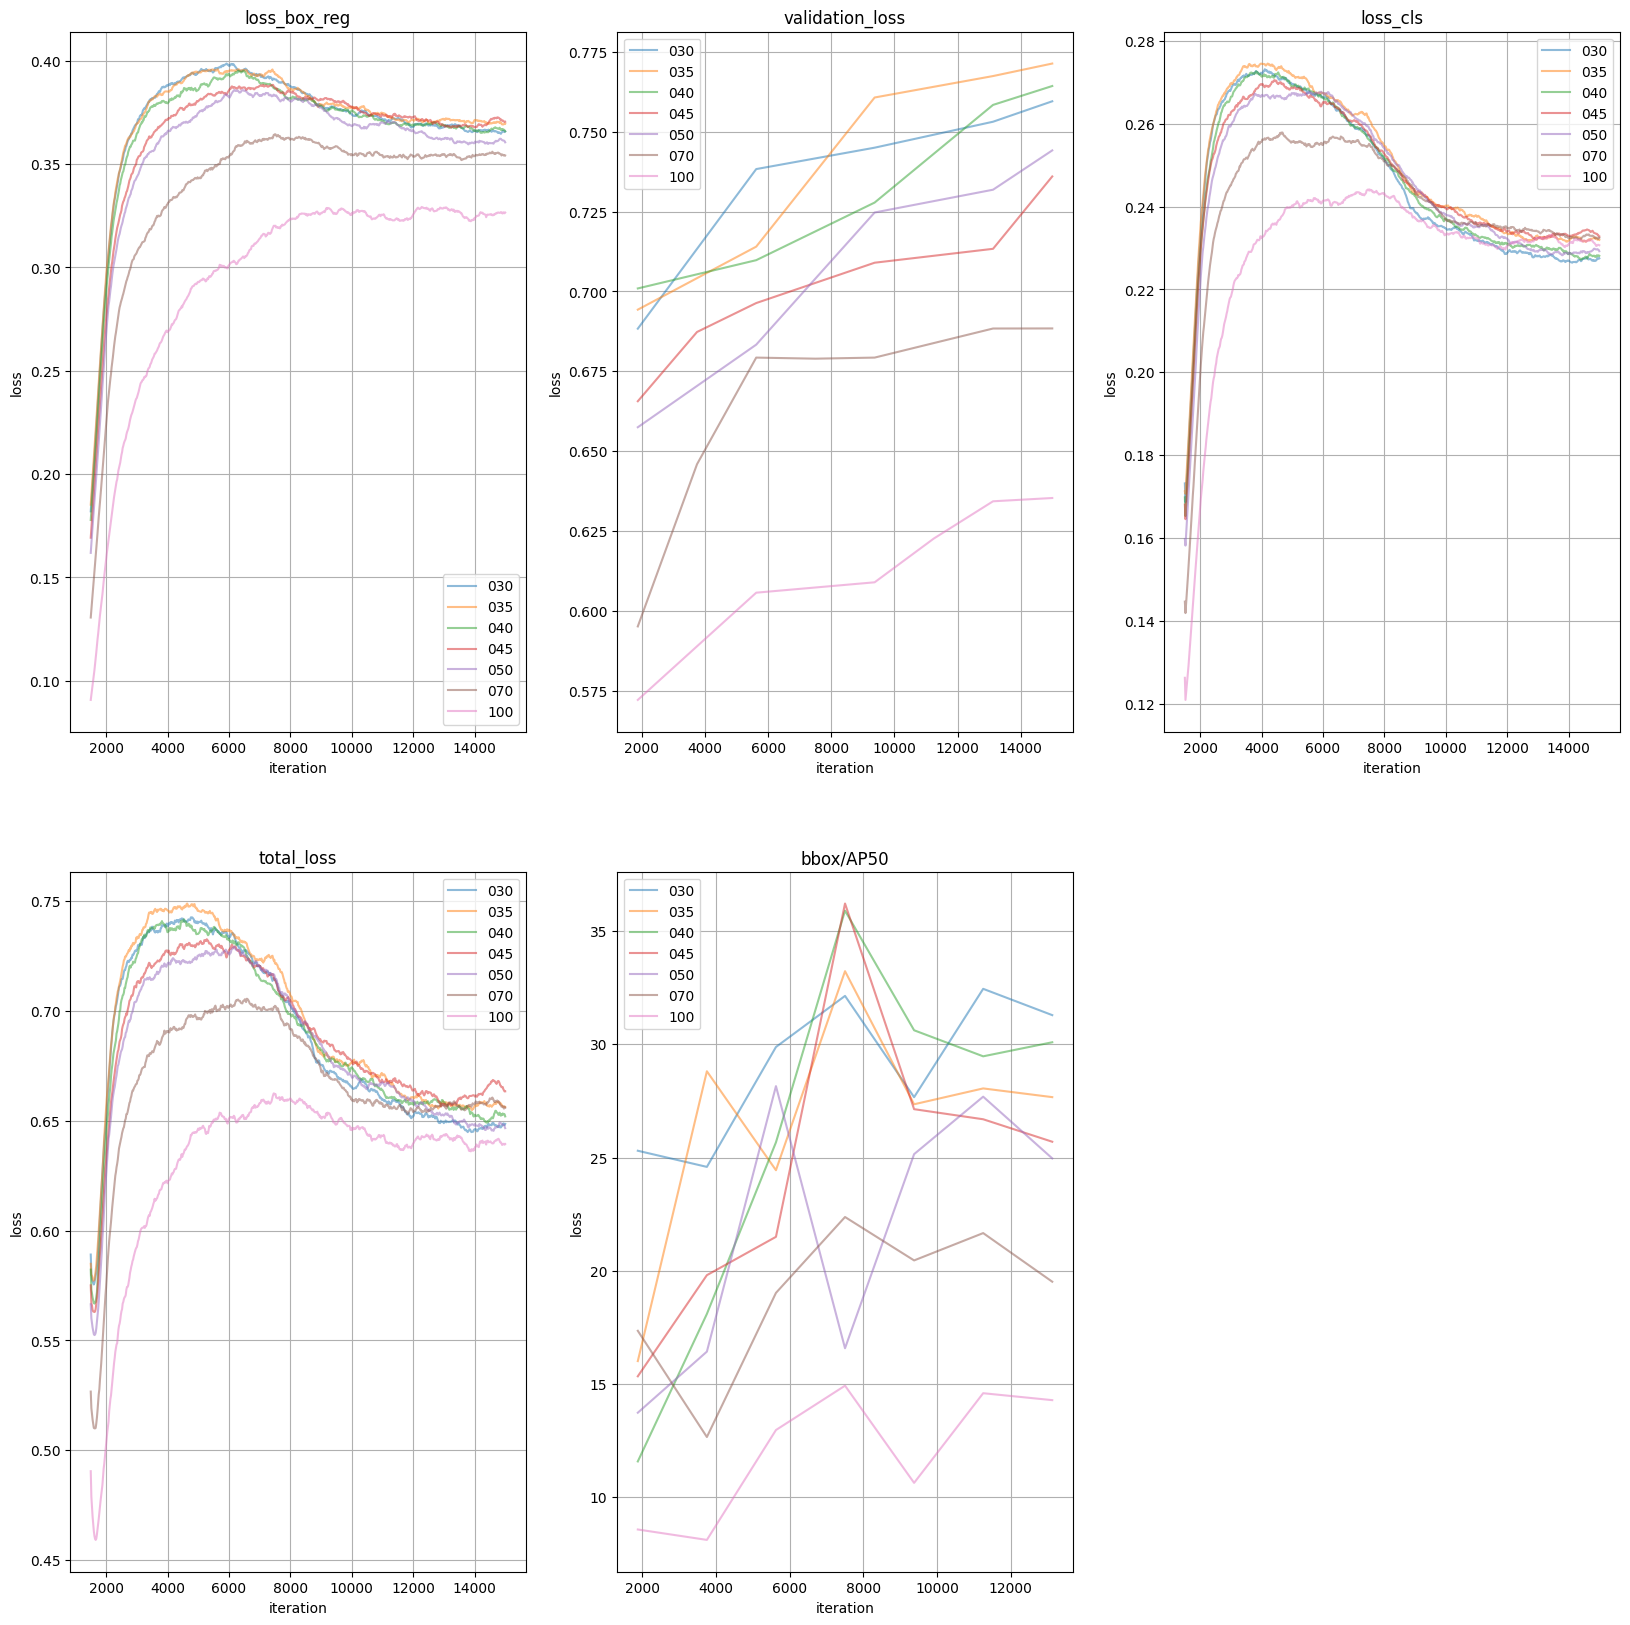

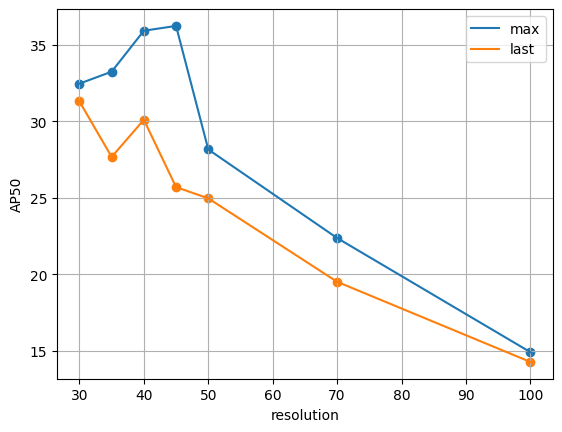

[32.448536879442024,
 33.22767733649034,
 35.90073644379196,
 36.21425993160464,
 28.151897599995923,
 22.3741908391869,
 14.927404860126448]

In [7]:
list_of_files = glob.glob('/workspace/output/experiment1_04.10.12.33/*') ## THE weird one
list_of_files = glob.glob('/workspace/output/experiment1_val_conf3_04.14.15.43/*')
# * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)
plot_metrics(list_of_files[:-1], resolution_set)

## USE FOLDERS TILL HERE

In [44]:
lines = load_json_arr('/workspace/output/experiment1_val_04.11.15.22/res050_50/metrics.json')

[(x['bbox/AP50'],x['iteration']) for x in lines if 'validation_loss' in x and 'bbox/AP50' in x]

[(14.146115838070305, 999),
 (19.34019790014477, 1999),
 (18.26736636081442, 2999),
 (31.905830568030236, 3999),
 (21.78982625902083, 4999),
 (21.000970412584586, 5999),
 (21.2868899606233, 6999),
 (20.66145265349708, 7999),
 (30.72588655758436, 8999),
 (20.39748933595845, 9999),
 (14.524892223465514, 10999),
 (27.066616267349247, 11999),
 (25.260901584740463, 12999),
 (23.820888488341136, 13999),
 (27.591171000103582, 14999),
 (21.232232540205555, 15999),
 (22.548395958998604, 16999),
 (23.78877949994398, 17999),
 (25.386711417467517, 18999),
 (24.651669077236345, 19999),
 (25.209178449472468, 20999),
 (24.329599859822032, 21999),
 (24.570648409591453, 22999)]

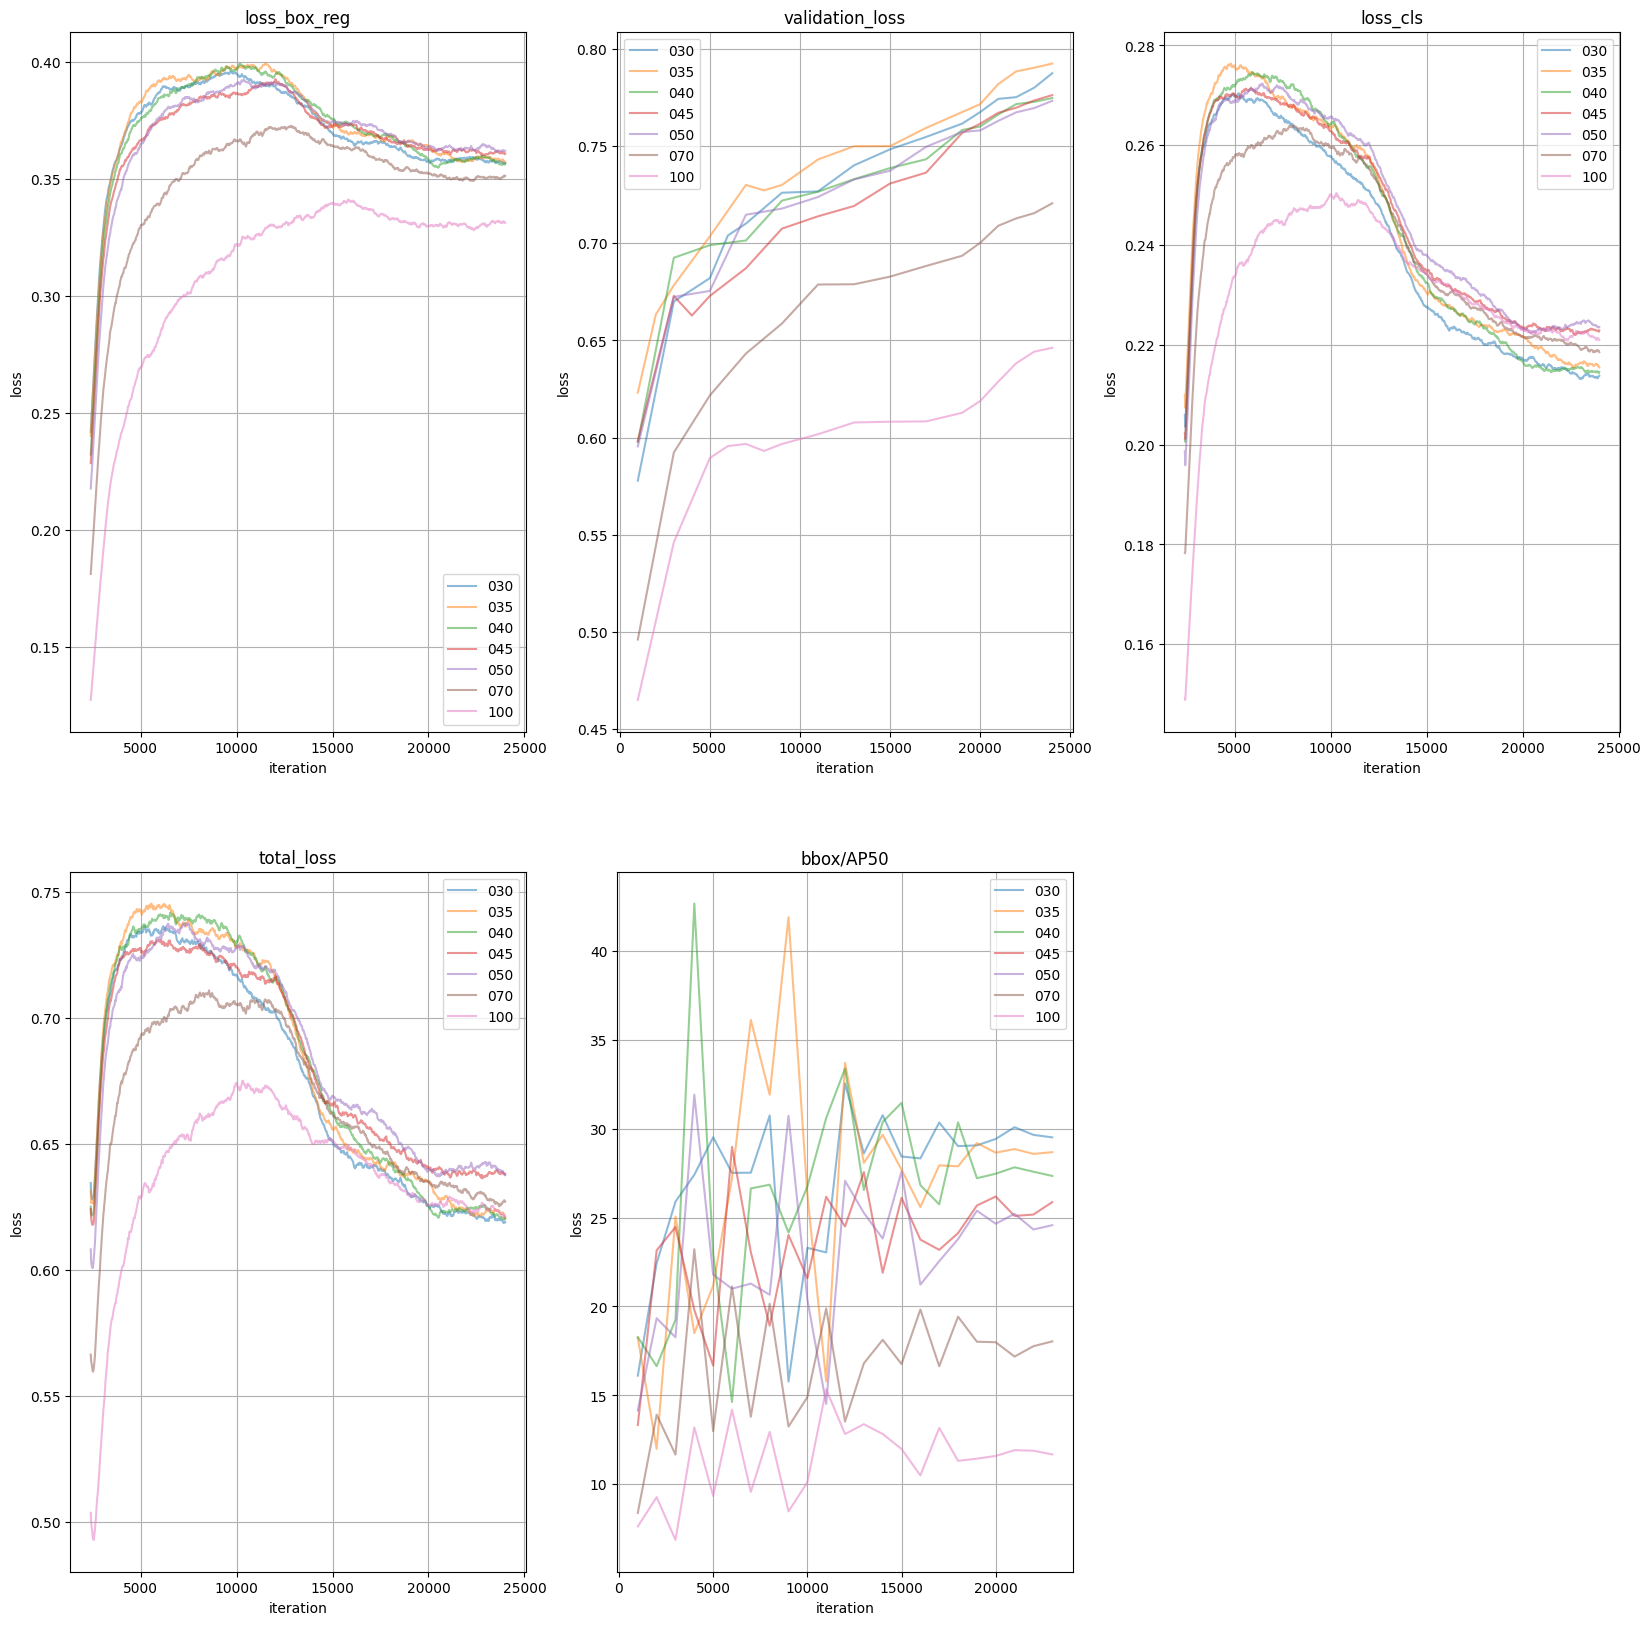

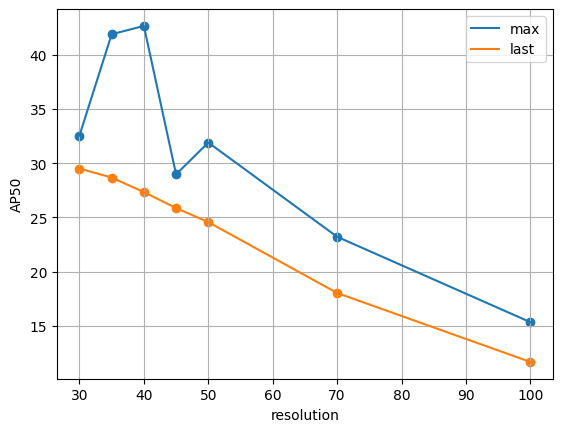

In [41]:
list_of_files = glob.glob('/workspace/output/experiment1_val_04.11.15.22/*') # * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)
plot_metrics(list_of_files[:-1], resolution_set)

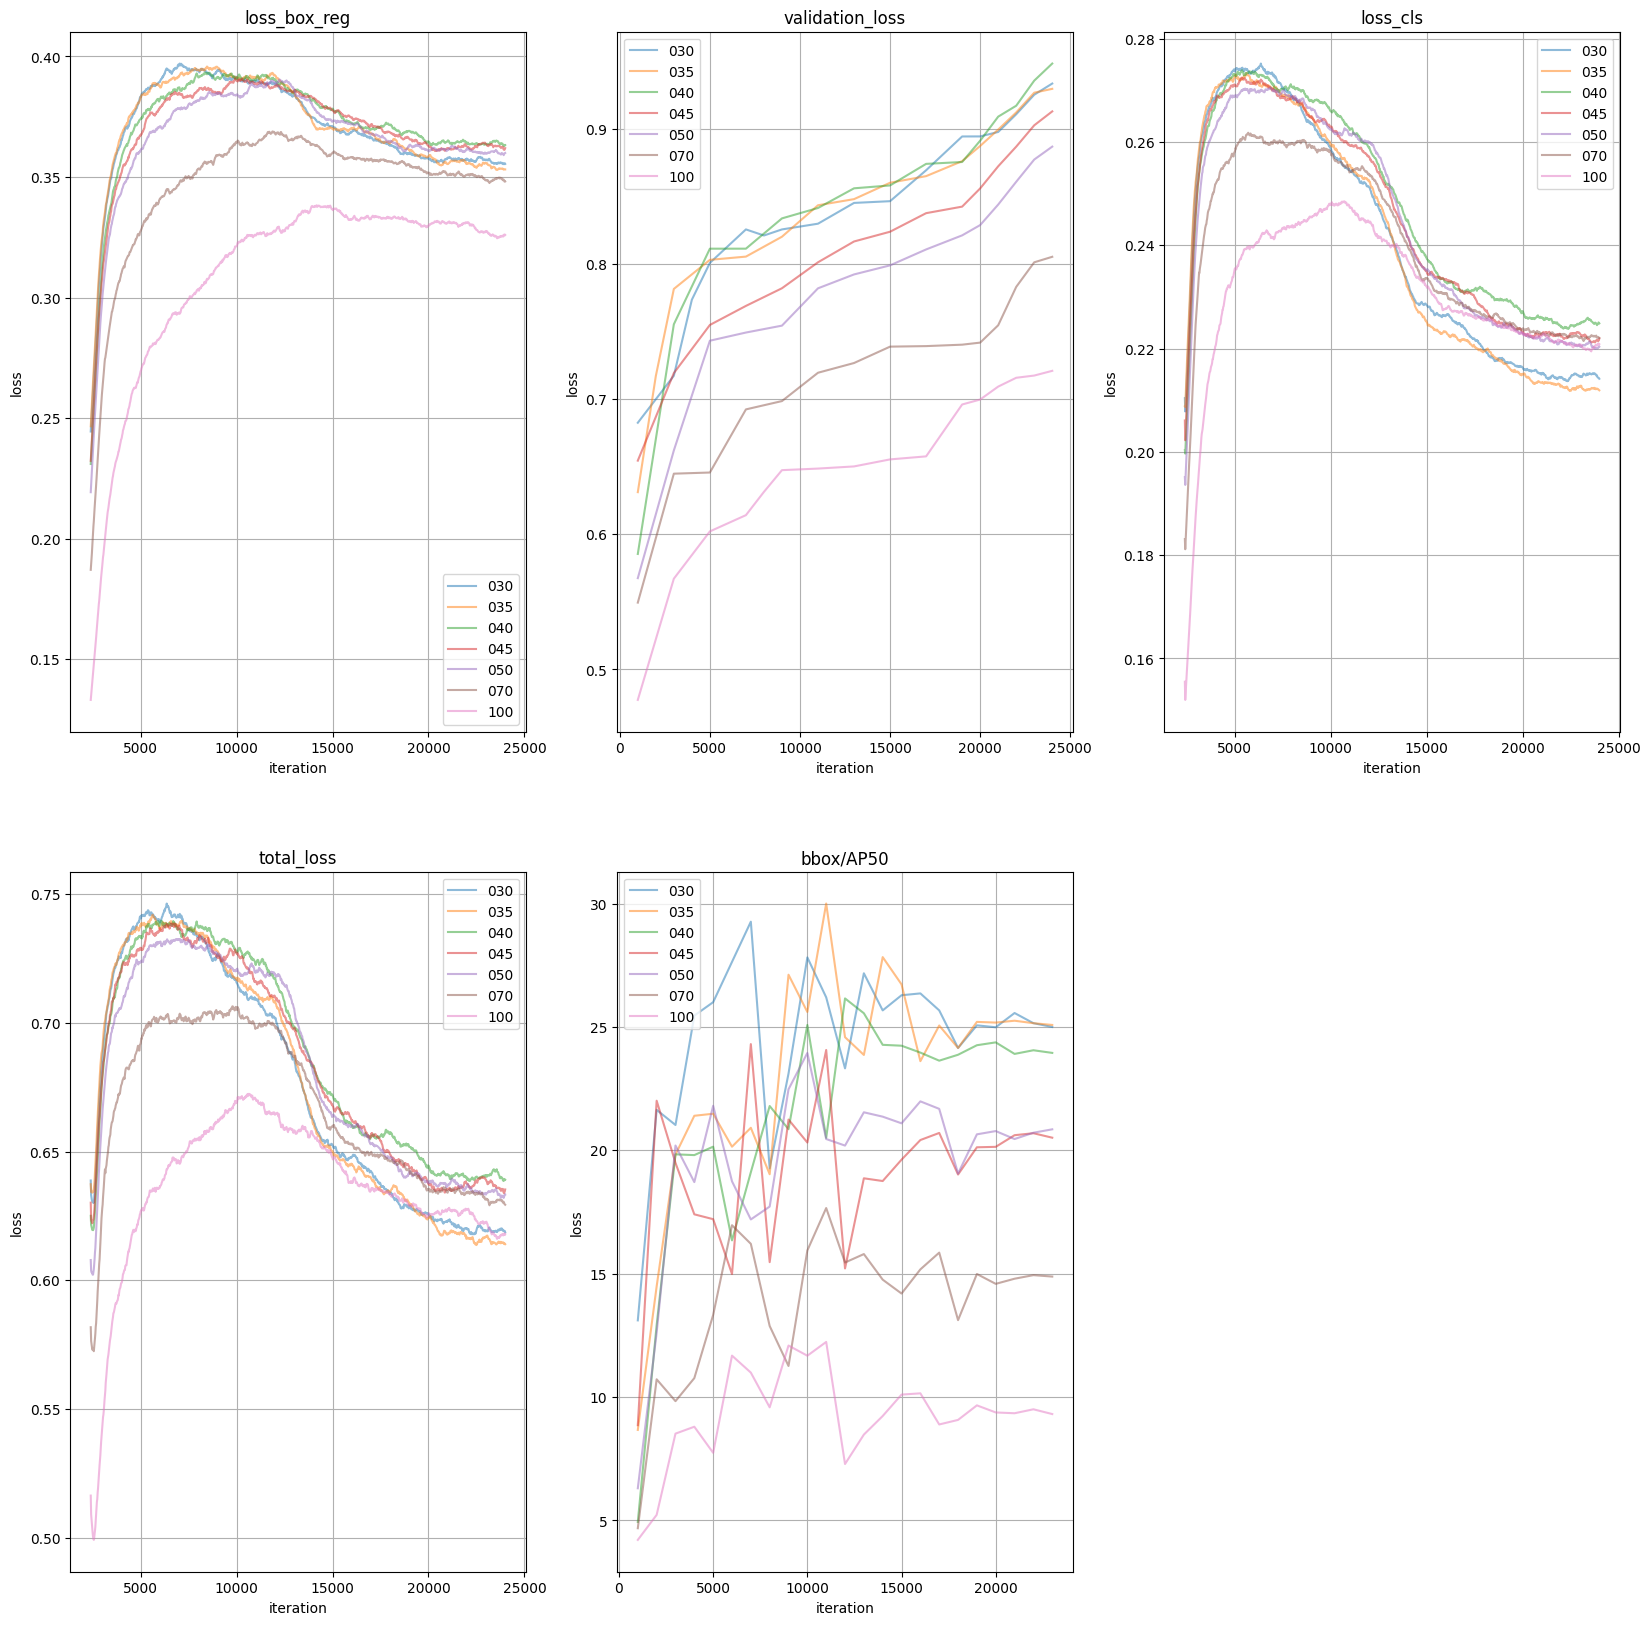

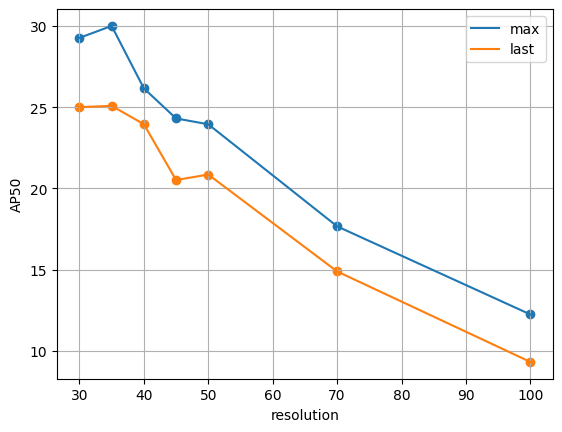

In [71]:
list_of_files = glob.glob('/workspace/output/experiment1_test_conf1_04.12.06.41/*') # * means all if need specific format then *.csv
list_of_files =sorted(list_of_files, key=os.path.getctime)
ap50_conf1 = plot_metrics(['/workspace/output/experiment1_test_conf1_04.11.15.35/res030_30', '/workspace/output/experiment1_test_conf1_04.12.06.41/res035_35', '/workspace/output/experiment1_test_conf1_04.12.06.41/res040_40', '/workspace/output/experiment1_test_conf1_04.12.06.41/res045_45', '/workspace/output/experiment1_test_conf1_04.12.06.41/res050_50', '/workspace/output/experiment1_test_conf1_04.12.06.41/res070_70', '/workspace/output/experiment1_test_conf1_04.12.06.41/res100_100', '/workspace/output/experiment1_test_conf1_04.12.06.41/results_tuning.json'][:-1], resolution_set)



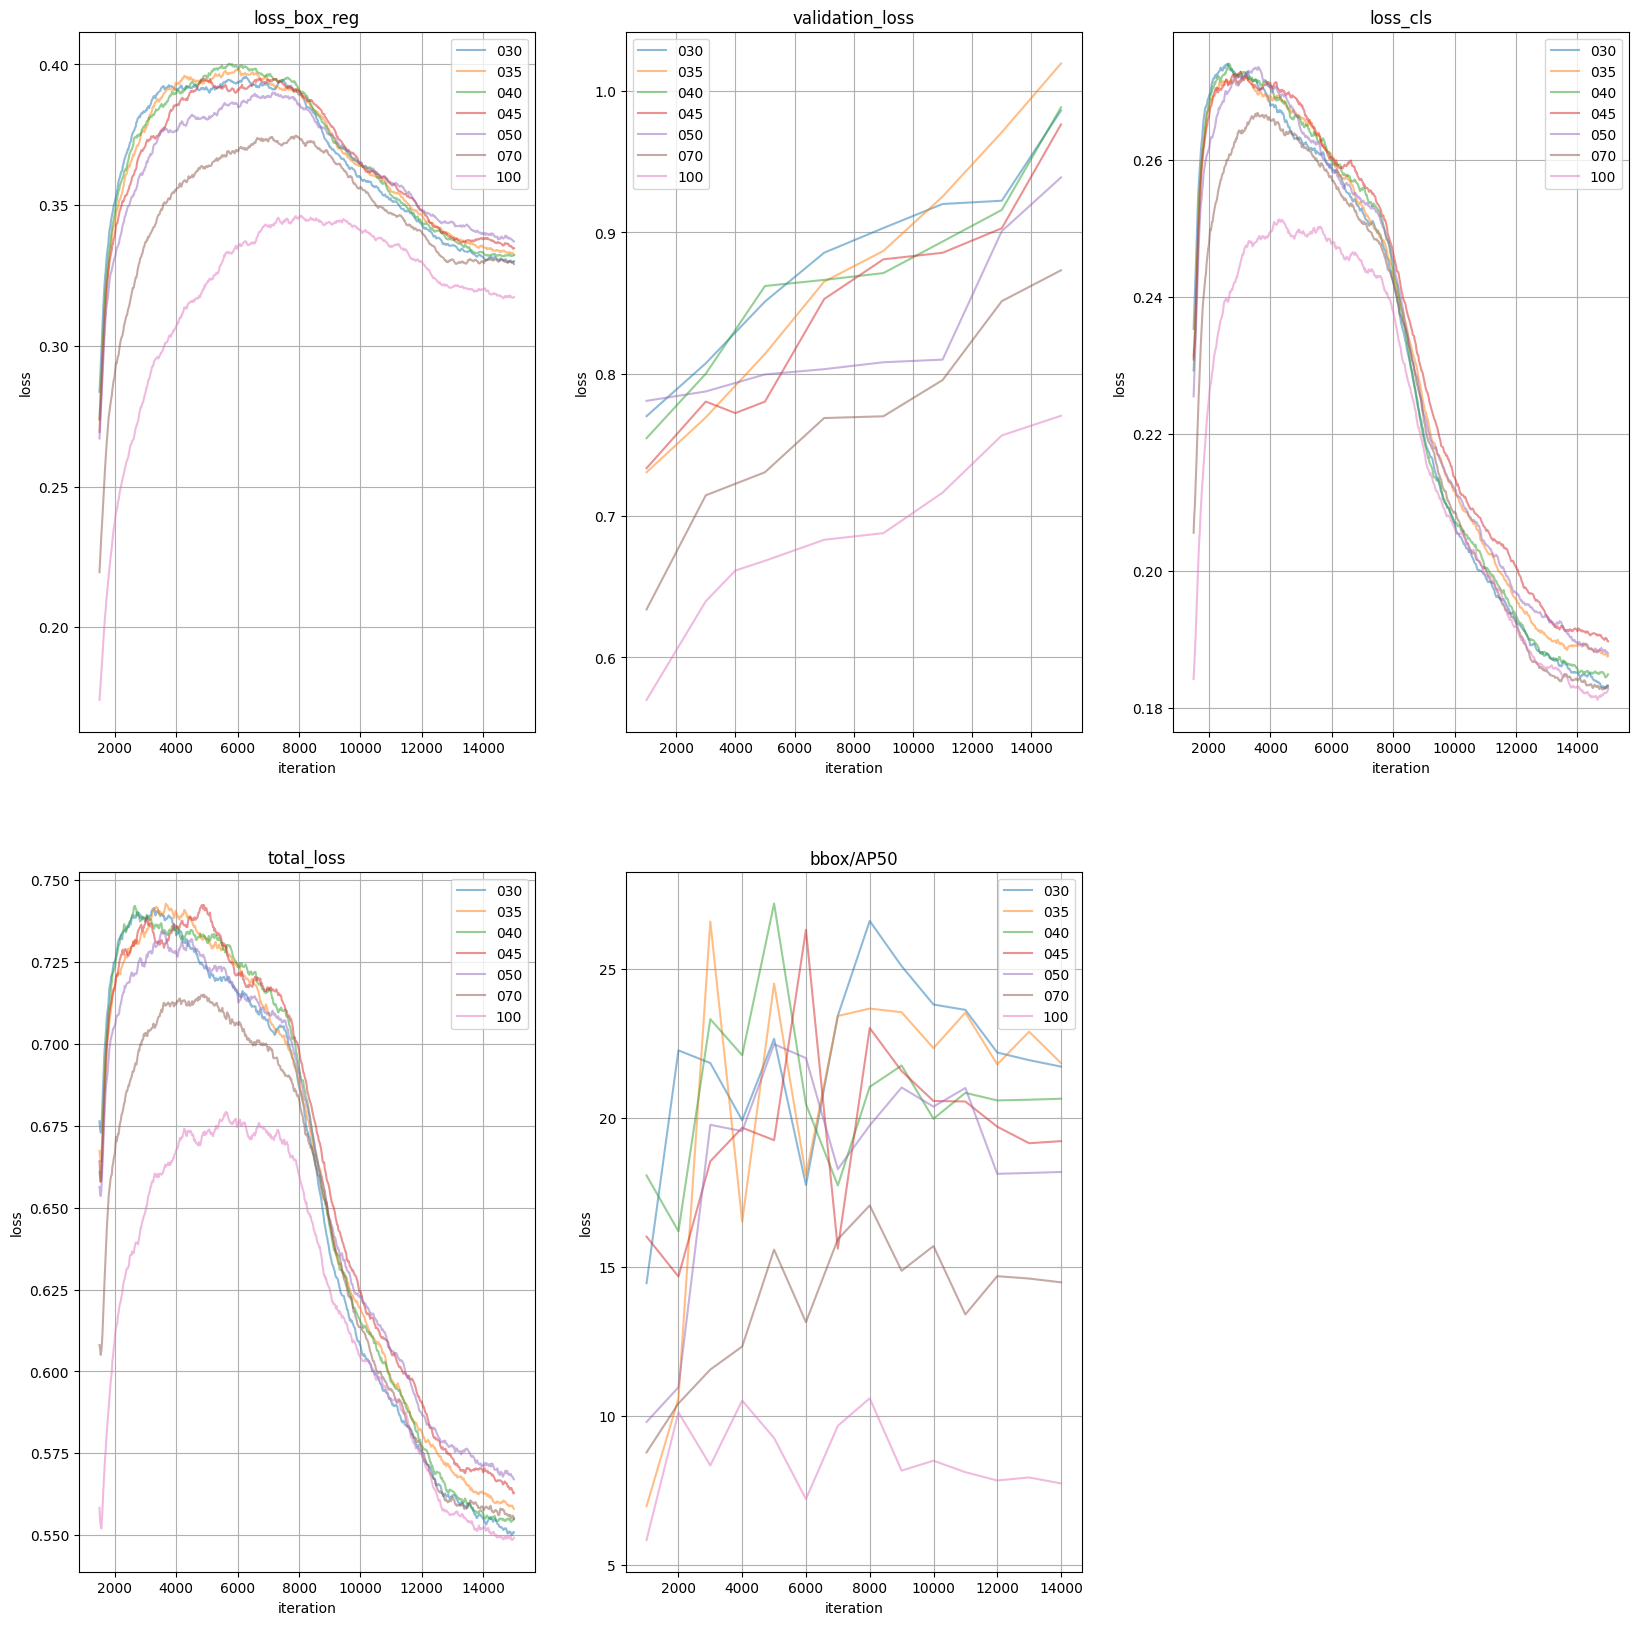

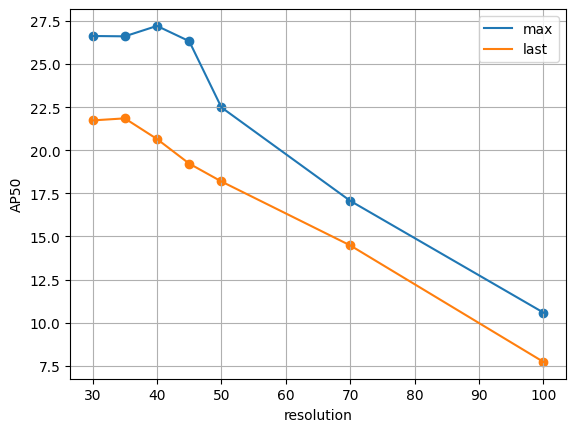

In [72]:
list_of_files = glob.glob('/workspace/output/experiment1_test_conf2_04.12.13.17/*') # * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)
ap50_conf2 = plot_metrics(list_of_files[:-1], resolution_set)

In [73]:
list_of_files = glob.glob('/workspace/output/experiment1_test__conf3_04.13.06.59/*') # * means all if need specific format then *.csv
list_of_files = sorted(list_of_files, key=os.path.getctime)
print(list_of_files)

['/workspace/output/experiment1_test__conf3_04.13.06.59/res030_30']


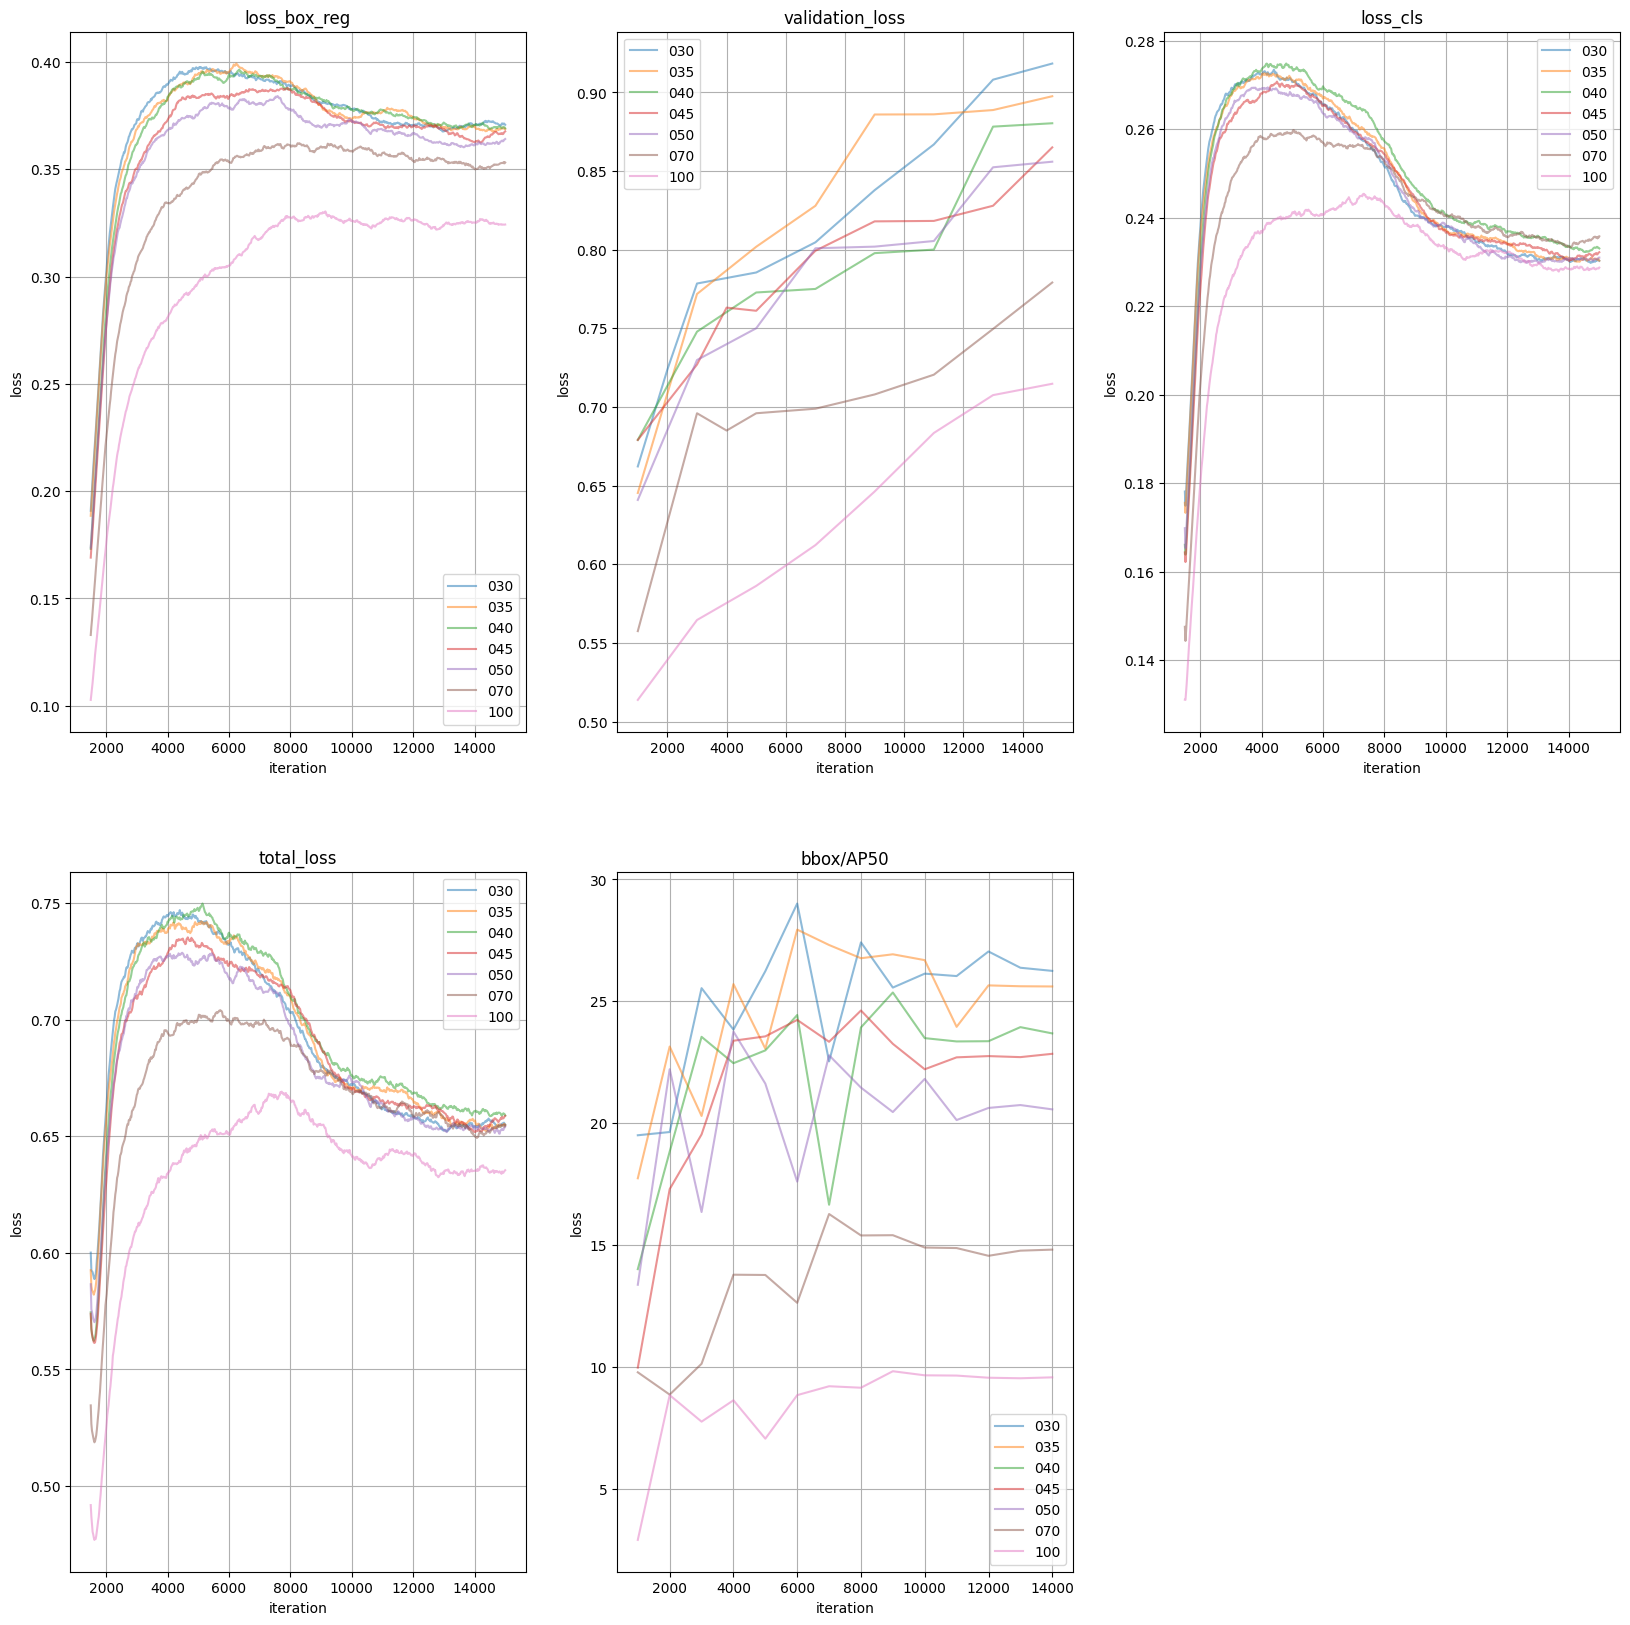

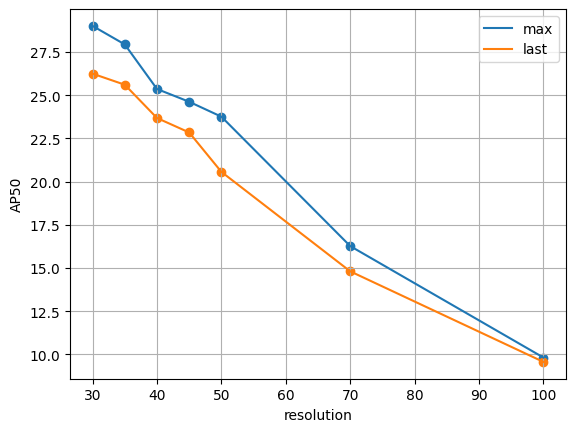

In [74]:


ap50_conf3 =plot_metrics(['/workspace/output/experiment1_test__conf3_04.13.06.59/res030_30','/workspace/output/experiment1_test__conf3_04.13.10.25/res035_35', '/workspace/output/experiment1_test__conf3_04.13.10.25/res040_40', '/workspace/output/experiment1_test__conf3_04.13.10.25/res045_45', '/workspace/output/experiment1_test__conf3_04.13.10.25/res050_50', '/workspace/output/experiment1_test__conf3_04.13.10.25/res070_70', '/workspace/output/experiment1_test__conf3_04.13.10.25/res100_100', '/workspace/output/experiment1_test__conf3_04.13.10.25/results_tuning.json'][:-1], resolution_set)

In [ ]:
ap50_conf1

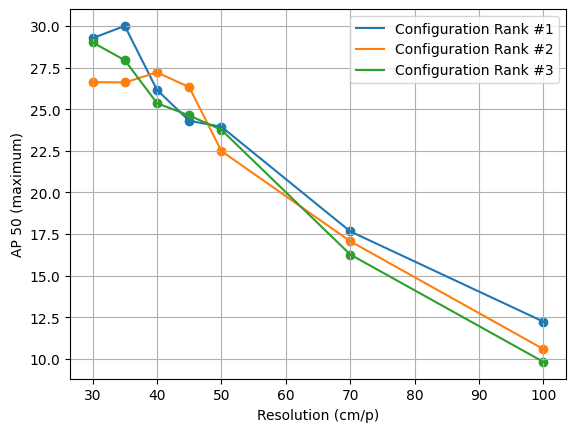

In [82]:
### Results on Validation Set... 
for i, y in enumerate([ap50_conf1, ap50_conf2, ap50_conf3]):
    plt.scatter([int(i) for i in resolution_set], y)
    plt.plot([int(i) for i in resolution_set], y, label = f"Configuration Rank #{i + 1}")
plt.xlabel("Resolution (cm/p)")
plt.ylabel("AP 50 (maximum)")
plt.legend()
plt.grid()
plt.show()

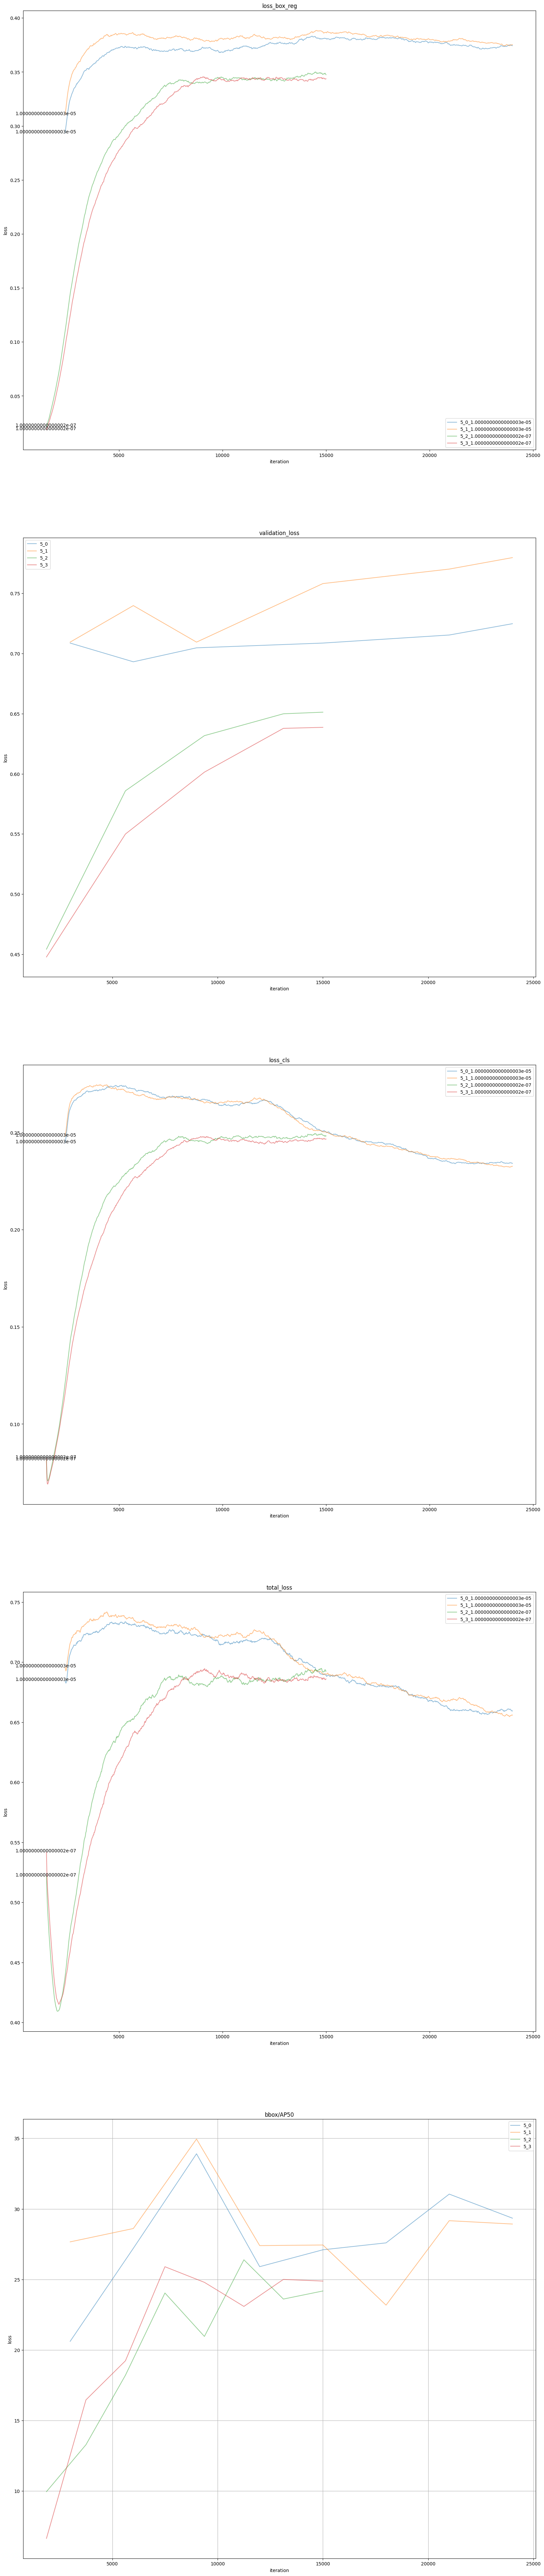

In [61]:
# Explore Training of Hyperparameter Tuning

plotting_files = [
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_0',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_1',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_2',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_3',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_4',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_5',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_6',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_7',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_8',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_9',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_10',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_11',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_12',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_13',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_14',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_15',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_16',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_17',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_18',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_19',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_20',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_21',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_22',
 '/workspace/output/hyper_tune_5_04.05.14.09/res030_23',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_0',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_1',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_2',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_3',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_4',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_5',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_6',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_7',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_8',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_9',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_10',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_11',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_12',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_13',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_14',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_15',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_16',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_17',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_18',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_19',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_20',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_21',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_22',
 '/workspace/output/hyper_tune_8_04.05.14.12/res030_23',
]

bs =[5 for i in range(24)] + [8 for i in range(24)]

ap50_max = []
ap50_last = []
window_divider = 10 # divides the number of iterations for averaging window set

plt.figure(figsize = (20,100))
for n, loss in enumerate(['loss_box_reg', 'validation_loss', 'loss_cls', 'total_loss', 'bbox/AP50']):
    plt.subplot(5,1,n+1)
    
    for k, latest_file in enumerate(plotting_files):

        def load_json_arr(json_path):
            lines = []
            with open(json_path, 'r') as f:
                for line in f:
                    lines.append(json.loads(line))
            return lines

        experiment_metrics = load_json_arr(latest_file + '/metrics.json')
        
        ap50_max.append(max([met["bbox/AP50"] for met in experiment_metrics if 'bbox/AP50' in met and 'validation_loss' in met]))
        ap50_last.append([met["bbox/AP50"] for met in experiment_metrics  if 'bbox/AP50' in met and 'validation_loss' in met][-1])
        last_lr  = [met["lr"] for met in experiment_metrics  if 'lr' in met][-1]
        
        # Extract the values for the specified loss
        loss_values = [x[loss] for x in experiment_metrics if loss in x]
        
        if loss not in ['validation_loss','bbox/AP50'] and window_divider >0:
            window_size = round(len(loss_values)/window_divider)

            # Calculate the rolling average of the loss over a specified window size
            loss_avg = np.convolve(loss_values, np.ones(window_size) / window_size, mode='valid')


            plt.plot(
                [x['iteration'] for x in experiment_metrics if loss in x][window_size-1:], 
                loss_avg, 
                label = f'{bs[k]}_{k}_{last_lr}',
                alpha = 0.5
            )
            plt.xlabel('iteration')
            plt.ylabel('loss')
            plt.title(loss)
            plt.text(0, loss_avg[0], last_lr)
            plt.legend()
            plt.grid()
        
        else: 
            plt.plot(
                [x['iteration'] for x in experiment_metrics if loss in x], 
                loss_values, 
                label = f'{bs[k]}_{k}',
                alpha = 0.5
            )
            plt.xlabel('iteration')
            plt.ylabel('loss')
            plt.title(loss)
            plt.legend()
            plt.grid()
            

plt.grid()
plt.show()


# plt.plot([int(res) for res in resolution_set], ap50_max[:len(resolution_set)], label = "max")
# plt.scatter([int(res) for res in resolution_set], ap50_max[:len(resolution_set)])
# plt.plot([int(res) for res in resolution_set], ap50_last[:len(resolution_set)], label = 'last')
# plt.scatter([int(res) for res in resolution_set], ap50_last[:len(resolution_set)])
# plt.legend()
# plt.grid()
# plt.xlabel('resolution')
# plt.ylabel("AP50")
# plt.show()

# For paper & individual saving

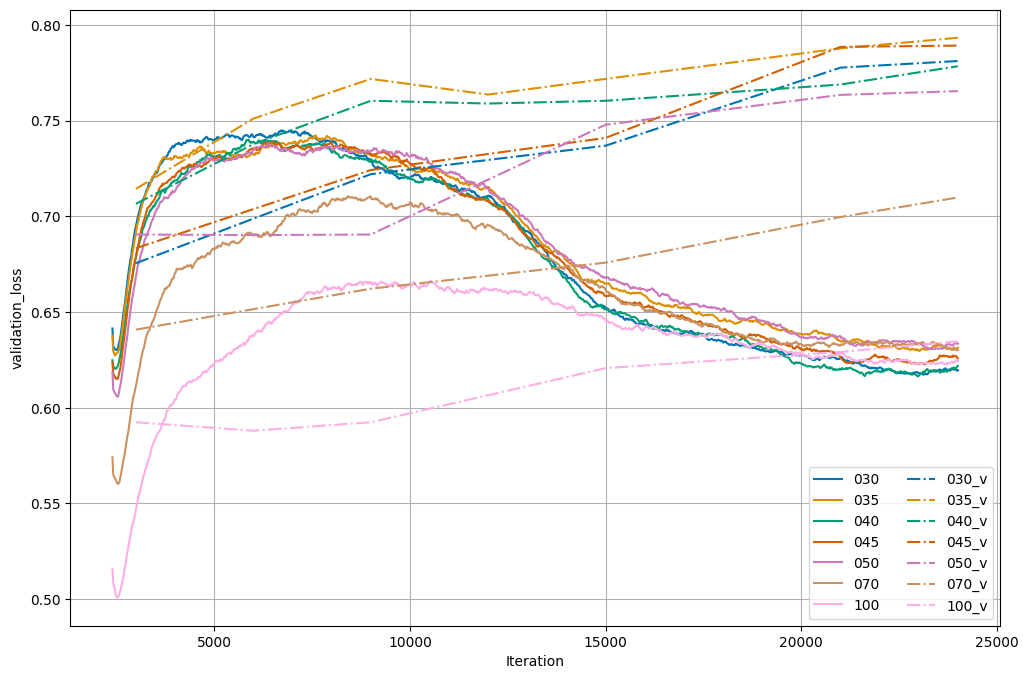

In [6]:

plotting_files = ['/workspace/output/experiment1_04.09.14.12/res030_30',
             '/workspace/output/experiment1_04.09.16.31/res035_35',
             '/workspace/output/experiment1_04.09.18.58/res040_40',
             '/workspace/output/experiment1_04.09.21.23/res045_45',
             '/workspace/output/experiment1_04.09.23.50/res050_50',
             '/workspace/output/experiment1_04.10.02.03/res070_70',
             '/workspace/output/experiment1_04.10.04.16/res100_100']

import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette('colorblind',  as_cmap=True)

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

ltys = ['-','--','-.',':']
resolution_set = ['030','035','040','045','050','070','100']

def save_metrics(plotting_files, 
                 resolution_set, 
                window_divider = 10,   # divides the number of iterations for averaging window set
                losses = ['loss_box_reg', 'loss_cls', 'total_loss', 'validation_loss', 'bbox/AP50']): 
    ap50_max = []
    ap50_last = []

    plt.figure(figsize = (12,8))    
    for n, loss in enumerate(losses):
        #plt.subplot(2,3,n+1)

        l = 0
        for latest_file, res in zip(plotting_files, resolution_set):
            

            experiment_metrics = load_json_arr(latest_file + f'/metrics.json')

            # Extract the values for the specified loss
            loss_values = [x[loss] for x in experiment_metrics if loss in x]

            if loss not in ['validation_loss','bbox/AP50'] and window_divider >0:
                window_size = round(len(loss_values)/window_divider)

                # Calculate the rolling average of the loss over a specified window size
                loss_avg = np.convolve(loss_values, np.ones(window_size) / window_size, mode='valid')            
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x][window_size-1:], 
                    loss_avg, 
                    label = res,
                    color = colors[l],
                    linestyle = ltys[0],
                    alpha = 1
                )
                plt.xlabel('Iteration')
                plt.ylabel(loss)
                #plt.title(loss)
                #plt.grid()

            else: 
                plt.plot(
                    [x['iteration'] for x in experiment_metrics if loss in x and 'validation_loss' in x], 
                    [x[loss] for x in experiment_metrics if loss in x and 'validation_loss' in x], 
                    label = f"{res}_v",
                    linestyle = ltys[len(losses)],
                    color = colors[l],
                    alpha = 1
                )
                plt.xlabel('Iteration')
                plt.ylabel(loss)
                #plt.title(loss)
                
                #plt.grid()
            l += 1

        #plt.gca().set_axis_off()
    plt.legend(ncol = len(losses))
    plt.grid()
    plt.savefig(f"/workspace/figures/loss_curves_{str.replace(loss, '/','')}", 
            bbox_inches = 'tight',
            pad_inches = .25)
    plt.show()

    
    return 
    
save_metrics(plotting_files, resolution_set, losses = ['total_loss', 'validation_loss'])

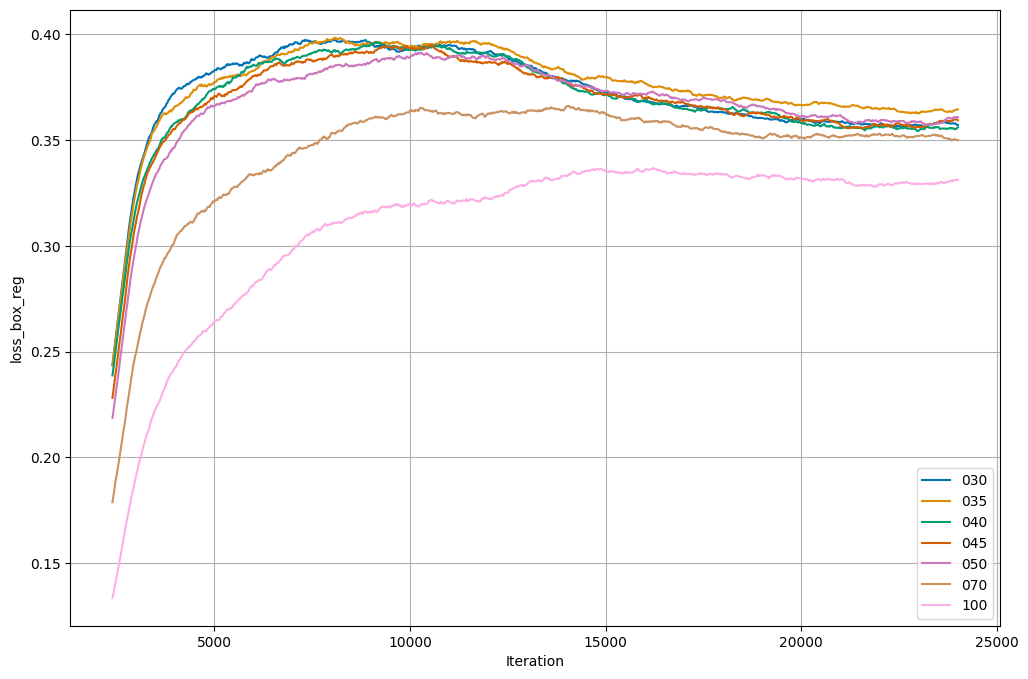

In [7]:
save_metrics(plotting_files, resolution_set, losses = ['loss_box_reg'])

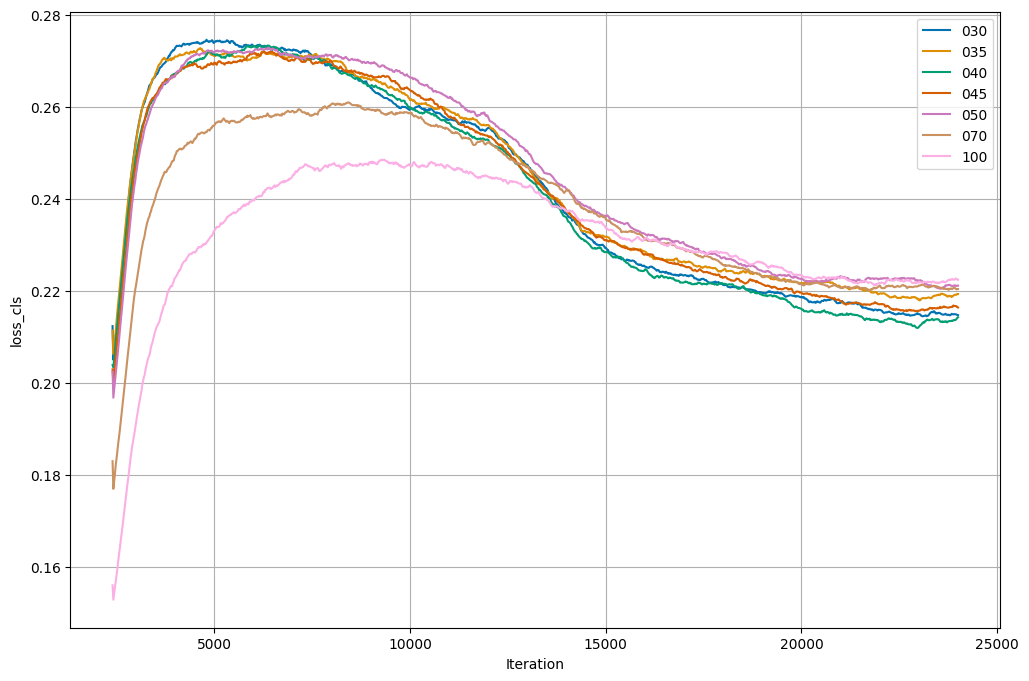

In [8]:
save_metrics(plotting_files, resolution_set, losses = ['loss_cls'])

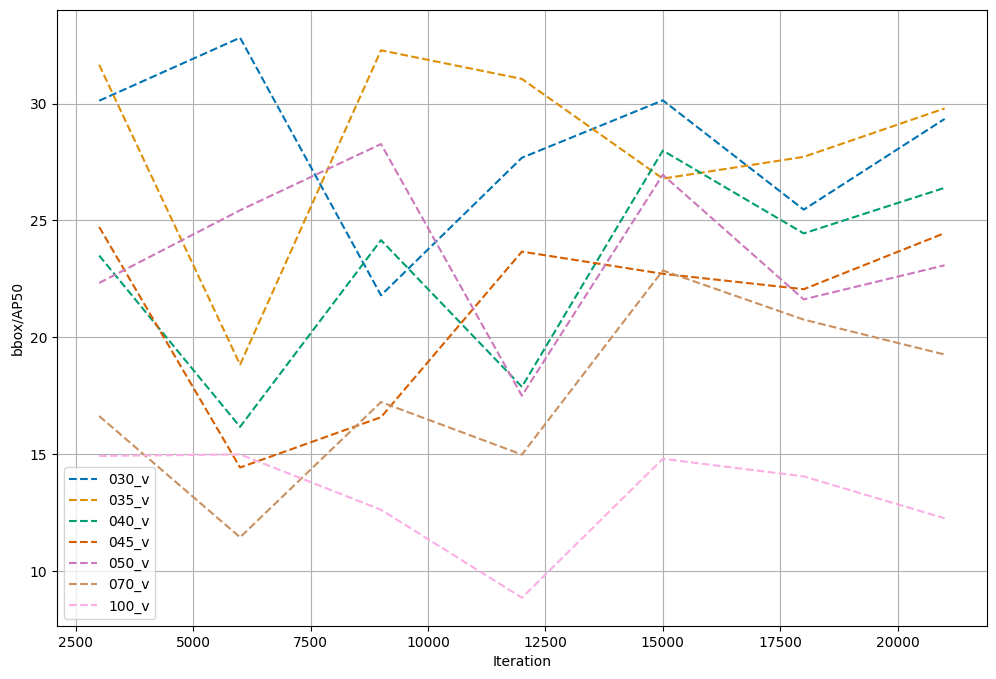

In [9]:
save_metrics(plotting_files, resolution_set, losses = ['bbox/AP50'])